In [1]:
import os
import yaml
import numpy as np
import neurokit2 as nk
import scipy
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import pandas as pd

import datasource

minmax_scaler = MinMaxScaler()

Hz = 100

def log(msg):
    print(msg)

In [2]:
"datasource explore"
# ds = ds_mesa.MesaDb(
#     "/home/mahabib/data/mesa/polysomnography", data_subdir="set2x10",
#     hz=Hz, class_map={0:0, 1:1, 2:1, 3:1, 5:2}, rr_seg_dim=100, n_subjects=1,
# )


ds = datasource.PhysionetSlpDbCsv(
    "/home/mahabib/data/physionet.org/files/slpdb/1.0.0/100hz", hz=Hz, 
    class_map={"W": 0, "1": 1, "2": 1, "3": 1, "4": 1, "R": 1,}, n_subjects=1,
    is_rr_sig=True, is_rsp=True
)


Data base-dir:/home/mahabib/data/physionet.org/files/slpdb/1.0.0/100hz, hz:100, seg_sec:30, class_map:{'W': 0, '1': 1, '2': 1, '3': 1, '4': 1, 'R': 1}, n_classes:2
Filter 2 records from 2
Loading slp01b...
[slp01b_annot.csv] n_seg:360, clz_lbl_dist:{1: 180, 0: 180}
Loading slp32...


/home/mahabib/anaconda3/lib/python3.10/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
/home/mahabib/anaconda3/lib/python3.10/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2
/home/mahabib/anaconda3/lib/python3.10/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: divide by zero encountered in divide
  mrrs /= th2
/home/mahabib/anaconda3/lib/python3.10/site-packages/neurokit2/signal/signal_fixpeaks.py:307: RuntimeWarning: invalid value encountered in divide
  mrrs /= th2


[slp32_annot.csv] n_seg:640, clz_lbl_dist:{0: 394, 1: 246}
Total files:2, n_seg:1000, distribution:(array([0, 1]), array([574, 426]))


label distribution: ['0:574', '1:426']


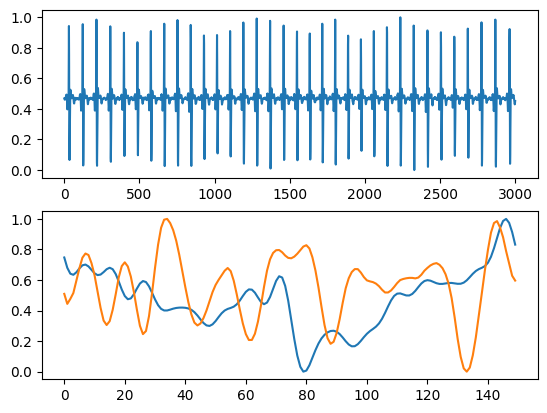

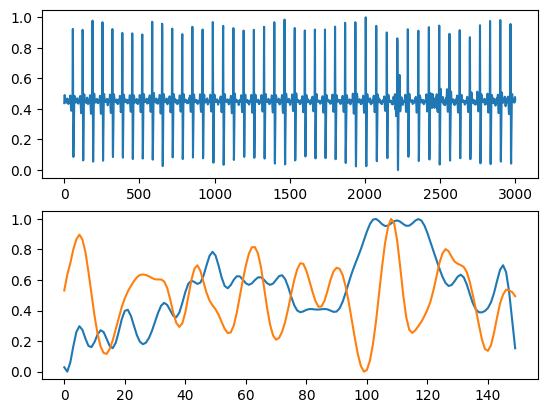

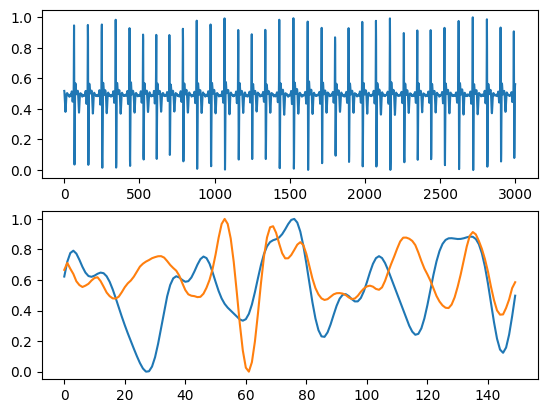

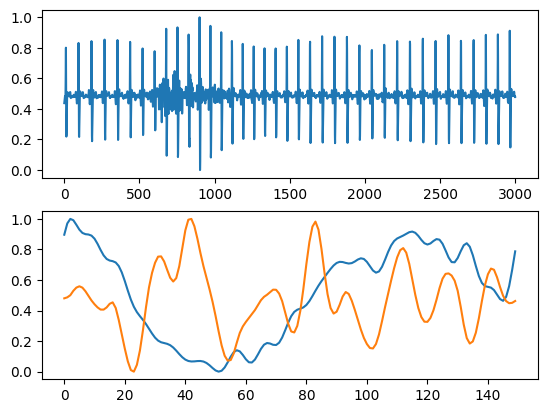

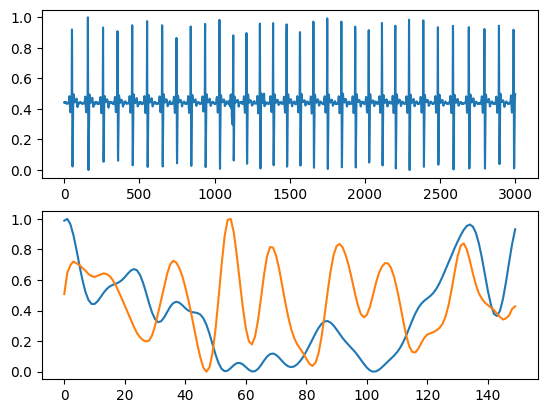

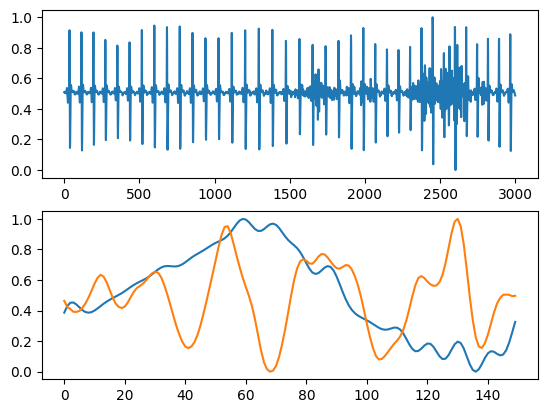

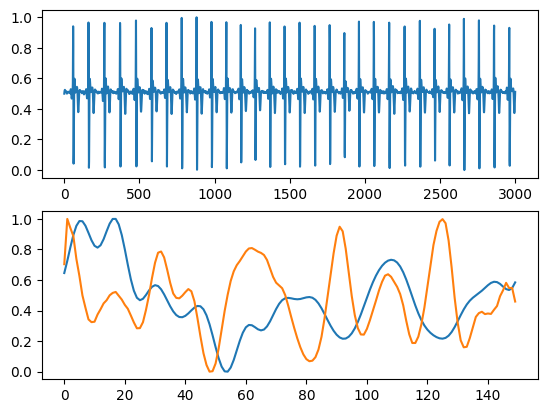

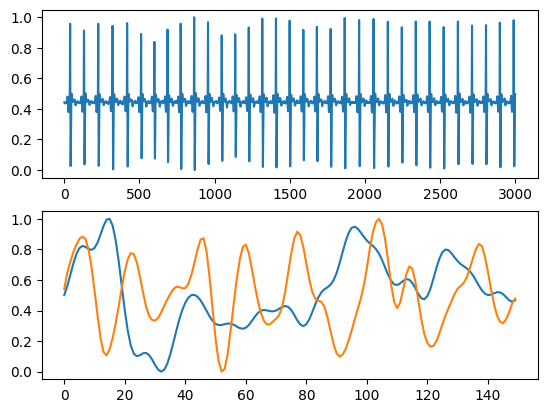

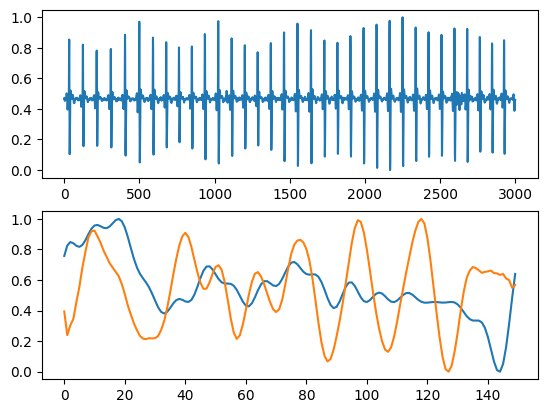

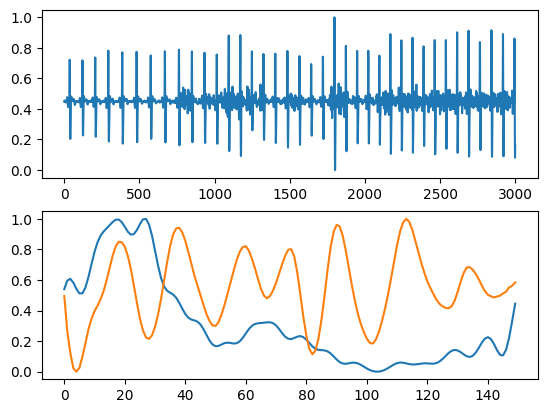

In [3]:
p_ds = datasource.PartialDataset(ds, seg_index=ds.indexes, shuffle=True)

# for i in range(10):
#     samp = p_ds[i]
#     ecg = samp['ecg'][0]
#     plt.plot(range(len(ecg)), ecg)
#     plt.show()

for i in range(10):
    samp = p_ds[i]
    ecg = samp['ecg'][0]
    rr = samp['rr'][0]
    rsp = samp['rsp'][0]
    fig, axs = plt.subplots(2)
    axs[0].plot(range(len(ecg)), ecg)
    axs[1].plot(range(len(rr)), rr)
    axs[1].plot(range(len(rsp)), rsp)
    plt.show()

In [3]:
p_ds = datasource.PartialDataset(
    dataset=ds, seg_index=ds.indexes
)
print(len(p_ds))

label distribution: ['0:229', '1:551']
780


In [4]:
samp = p_ds[0]
print(samp.keys())
print('ecg', samp['ecg'].shape, 'rr', samp['rr'].shape, 'rsp', samp['rsp'].shape,)

dict_keys(['rr', 'rsp', 'ecg', 'beats', 'label'])
ecg torch.Size([1, 3000]) rr torch.Size([1, 100]) rsp torch.Size([1, 100])


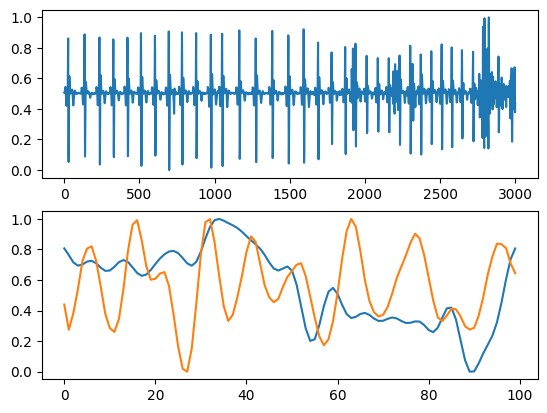

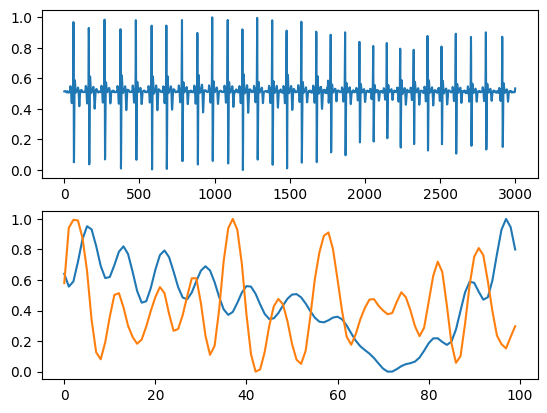

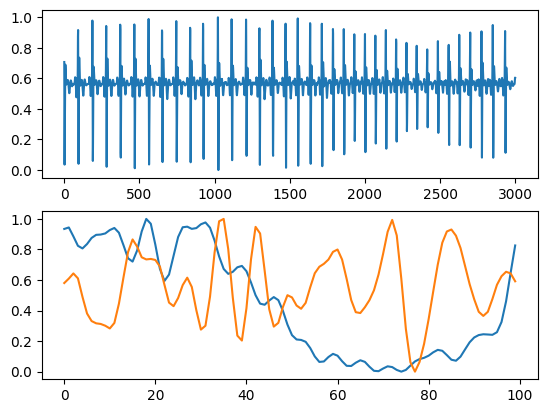

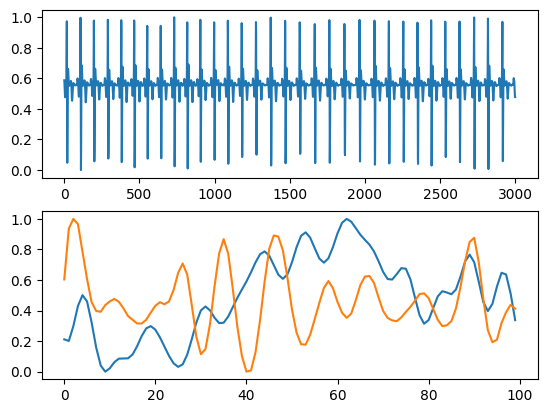

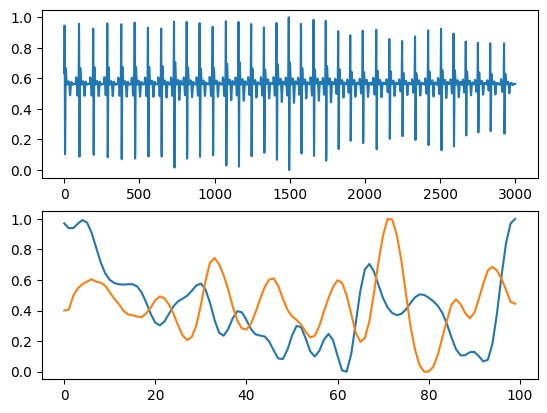

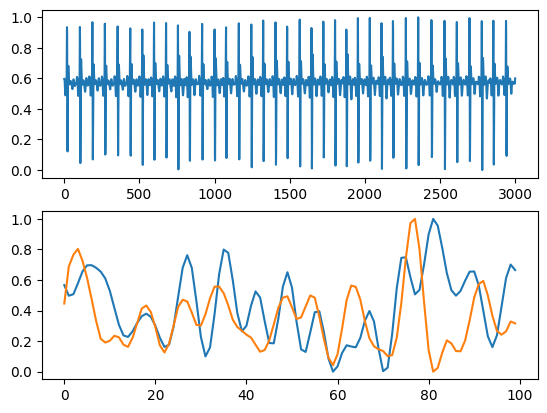

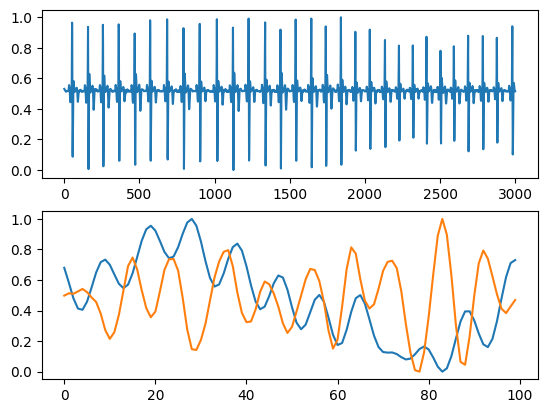

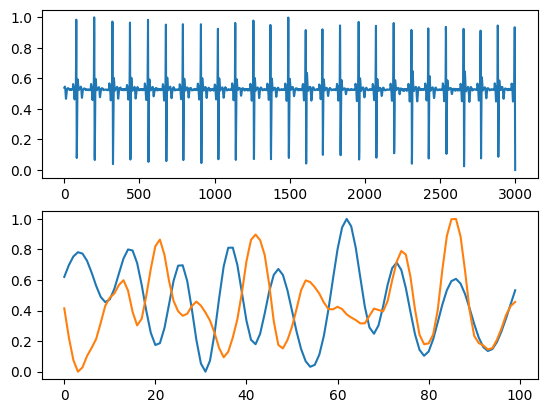

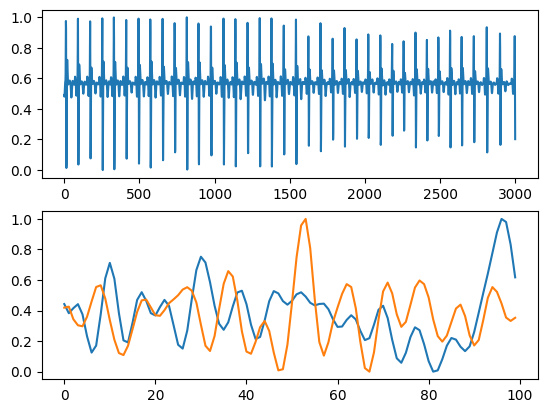

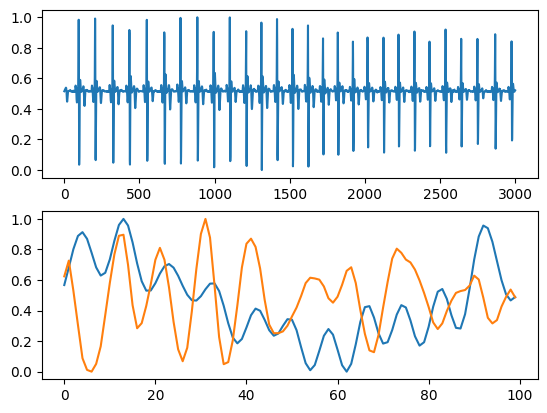

In [5]:
for i in range(10):
    samp = p_ds[i]
    ecg = samp['ecg'][0]
    rr = samp['rr'][0]
    rsp = samp['rsp'][0]
    fig, axs = plt.subplots(2)
    axs[0].plot(range(len(ecg)), ecg)
    axs[1].plot(range(len(rr)), rr)
    axs[1].plot(range(len(rsp)), rsp)
    plt.show()

In [2]:
params = None 
SIM_FILE = 'sim2multimodalEcgRR'
CFG_FILE = 'config_multimodal.yml'
with open(CFG_FILE, 'r') as stream:
        params = yaml.safe_load(stream)
        params['seg_len'] = params['hz'] * params['seg_len_sec']
        params['decoder']['width'] = params['seg_len']
print(params)

{'batch_size': 64, 'cuda': 0, 'data_path': 'data/mesa/polysomnography/set2x10', 'early_stop_delta': 0.001, 'early_stop_patience': 30, 'hz': 100, 'hz_rr': 5, 'lr': 0.001, 'lr_scheduler_patience': 10, 'max_epoch': 200, 'min_lr': '1e-6', 'seg_len_sec': 30, 'seg_len': 3000, 'n_split': 10, 'n_class': 2, 'input_ecg': True, 'input_rr': True, 'input_rsp': False, 'input_ecg_beats': False, 'encoder': {'in_channels': 1, 'channels': 128, 'depth': 5, 'reduced_size': 64, 'out_channels': 32, 'kernel_size': 5, 'dropout': 0.3, 'softplus_eps': 0.0001, 'sd_output': True}, 'decoder': {'k': 32, 'width': 3000, 'in_channels': 64, 'channels': 128, 'depth': 5, 'out_channels': 1, 'kernel_size': 5, 'gaussian_out': False, 'softplus_eps': 0.0001, 'dropout': 0.0}}


In [3]:
"""Data source"""
ds = datasource.MesaDbCsv(
    f"{os.path.expanduser('~')}/data/mesa/polysomnography", data_subdir="set2x10",
    hz=100, class_map={0:0, 1:1, 2:1, 3:1, 5:1}, n_subjects=1, hz_rr=5,
    is_rr_sig=params['input_rr'], is_rsp=params['input_rsp'], is_ecg_beats=False, log=log,
)

Data base-dir:/home/mahabib/data/mesa/polysomnography, data:set2x10, hz:100, class_map:{0: 0, 1: 1, 2: 1, 3: 1, 5: 1},
Filter 2 records from 2
Traceback (most recent call last):
  File "/home/mahabib/Documents/py_code/projects/ecg_sleep_multioutput/datasource.py", line 285, in _initialise
    get_derived_signals(
  File "/home/mahabib/Documents/py_code/projects/ecg_sleep_multioutput/datasource.py", line 54, in get_derived_signals
    _rpeaks, info = nk.ecg_peaks(y, sampling_rate=hz, correct_artifacts=True, show=False)
  File "/home/mahabib/anaconda3/lib/python3.10/site-packages/neurokit2/ecg/ecg_peaks.py", line 254, in ecg_peaks
    info.update(ecg_findpeaks(ecg_cleaned, sampling_rate=sampling_rate, method=info["method_peaks"], **kwargs))
  File "/home/mahabib/anaconda3/lib/python3.10/site-packages/neurokit2/ecg/ecg_findpeaks.py", line 70, in ecg_findpeaks
    rpeaks = func(ecg_cleaned, sampling_rate=sampling_rate, show=show, **kwargs)
  File "/home/mahabib/anaconda3/lib/python3.10/sit

/home/mahabib/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mahabib/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Traceback (most recent call last):
  File "/home/mahabib/Documents/py_code/projects/ecg_sleep_multioutput/datasource.py", line 285, in _initialise
    get_derived_signals(
  File "/home/mahabib/Documents/py_code/projects/ecg_sleep_multioutput/datasource.py", line 54, in get_derived_signals
    _rpeaks, info = nk.ecg_peaks(y, sampling_rate=hz, correct_artifacts=True, show=False)
  File "/home/mahabib/anaconda3/lib/python3.10/site-packages/neurokit2/ecg/ecg_peaks.py", line 254, in ecg_peaks
    info.update(ecg_findpeaks(ecg_cleaned, sampling_rate=sampling_rate, method=info["method_peaks"], **kwargs))
  File "/home/mahabib/anaconda3/lib/python3.10/site-packages/neurokit2/ecg/ecg_findpeaks.py", line 70, in ecg_findpeaks
    rpeaks = func(ecg_cleaned, sampling_rate=sampling_rate, show=show, **kwargs)
  File "/home/mahabib/anaconda3/lib/python3.10/site-packages/neurokit2/ecg/ecg_findpeaks.py", line 278, in _ecg_findpeaks_neurokit
    end_qrs = end_qrs[end_qrs > beg_qrs[0]]
IndexError: index 

['mesa-sleep-1324', 'mesa-sleep-3018']
label distribution: ['0:1284', '1:1281']


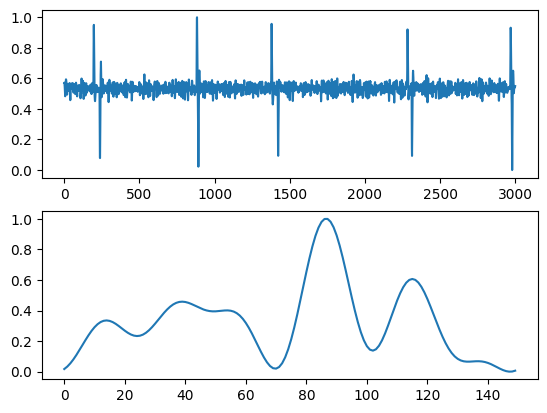

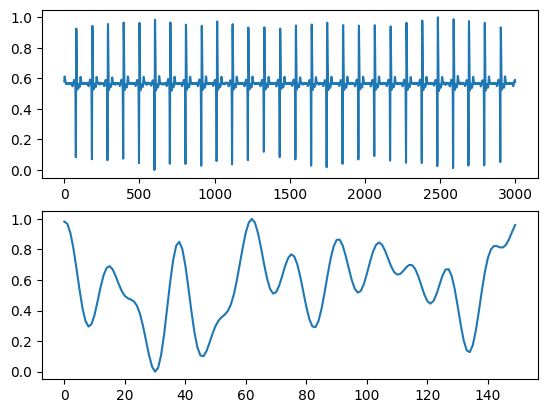

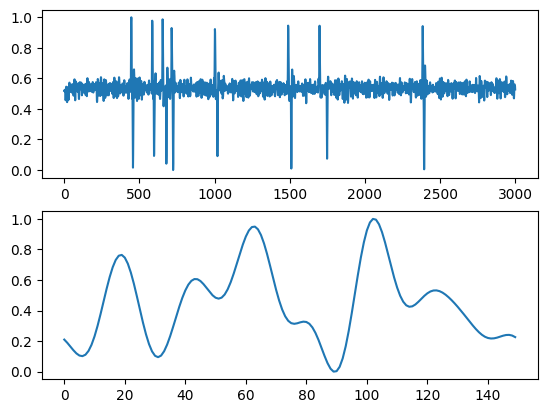

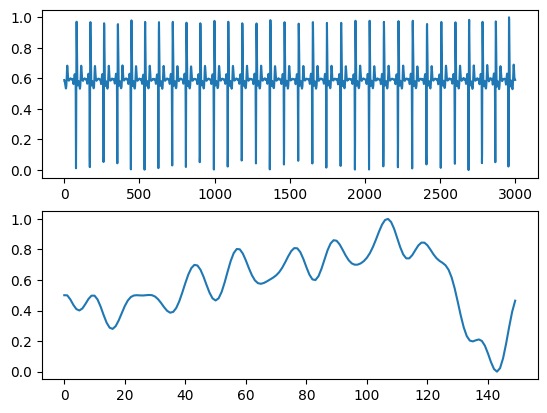

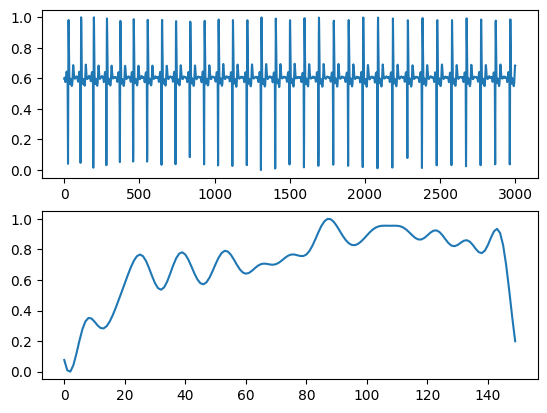

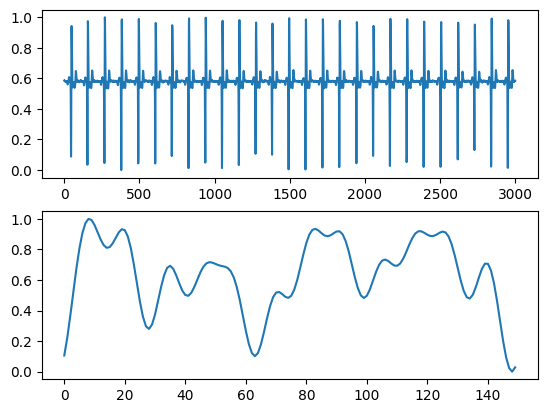

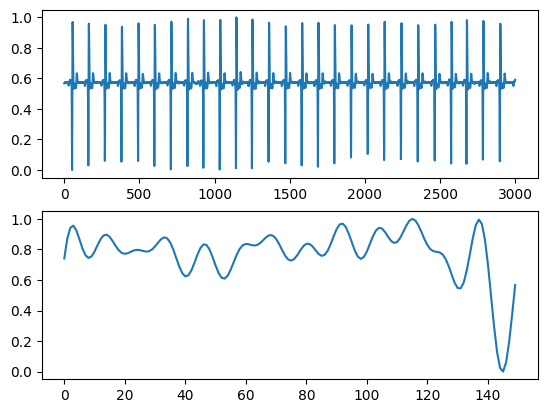

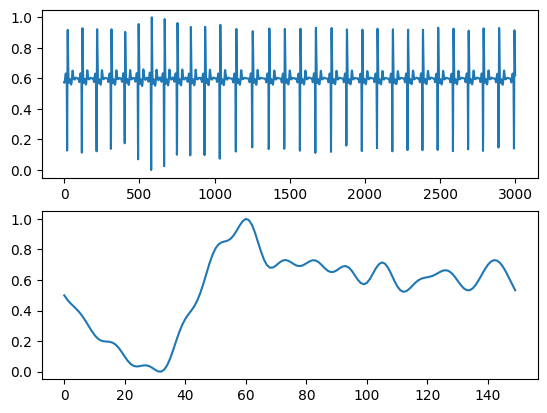

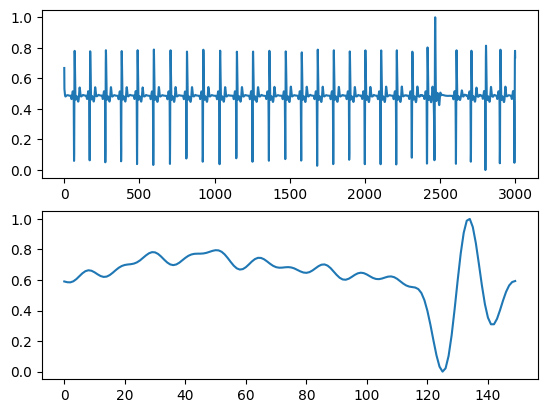

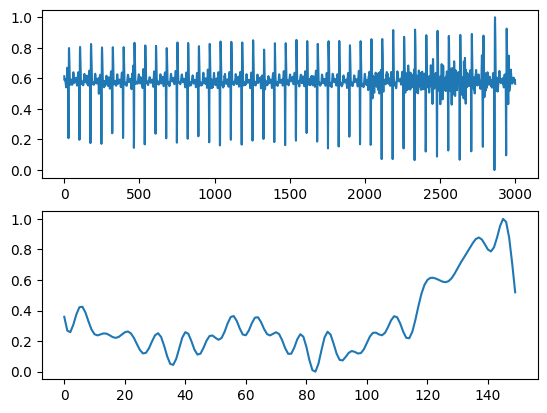

In [6]:
print(ds.record_names)
p_ds = datasource.PartialDataset(ds, seg_index=ds.indexes, shuffle=True)

for i in range(10):    
    samp = p_ds[i]
    # print(samp)
    ecg = samp['ecg'][0]
    rr = samp['rr'][0]
    # rsp = samp['rsp'][0]
    fig, axs = plt.subplots(2)
    axs[0].plot(range(len(ecg)), ecg)
    axs[1].plot(range(len(rr)), rr)
    # axs[1].plot(range(len(rsp)), rsp)
    plt.show()

In [ ]:
BASE_DIR = f"{os.path.expanduser('~')}/data/mesa/polysomnography"
DATA_SUBDIR = "set2x10" 
Hz = 100
data_dir = os.path.join(BASE_DIR, DATA_SUBDIR)
for f in os.listdir(data_dir):
    print(f)
    if f.endswith("_annot.csv"):
        df_annot = pd.read_csv(os.path.join(data_dir, f))
    else:
        df_sig = pd.read_csv(os.path.join(data_dir, f))[f"{Hz}hz"]
    print(df_annot.head())

    for ind in df_annot.index:
        print(df_annot['100hz_start'][ind], df_annot['stage'][ind])
        if ind > 5:
            break

    break

In [4]:
class_map = {0:0, 1:1, 2:1, 3:2, 4:2, 5:3}
n_class = len(set(class_map.values()))
ds_csv = datasource.MesaDbCsv(
    f"{os.path.expanduser('~')}/data/mesa/polysomnography", data_subdir="set2x10",
    hz=100, class_map=class_map, n_subjects=-1, filter_records=[]
)

Data base-dir:/home/mahabib/data/mesa/polysomnography, data:set2x10, hz:100, class_map:{0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3},
[mesa-sleep-1324_annot.csv] n_seg:1393, clz_lbl_dist:{0: 690, 1: 435, 2: 171, 3: 97}
[mesa-sleep-3018_annot.csv] n_seg:1199, clz_lbl_dist:{0: 621, 1: 497, 3: 81}
[mesa-sleep-1571_annot.csv] n_seg:1079, clz_lbl_dist:{0: 259, 1: 731, 3: 89}
[mesa-sleep-2876_annot.csv] n_seg:949, clz_lbl_dist:{0: 192, 1: 545, 2: 26, 3: 186}
[mesa-sleep-1673_annot.csv] n_seg:1359, clz_lbl_dist:{0: 479, 1: 606, 2: 80, 3: 194}
[mesa-sleep-1913_annot.csv] n_seg:863, clz_lbl_dist:{0: 109, 1: 400, 2: 186, 3: 168}
[mesa-sleep-1670_annot.csv] n_seg:1079, clz_lbl_dist:{0: 379, 1: 447, 2: 110, 3: 143}
[mesa-sleep-3392_annot.csv] n_seg:1114, clz_lbl_dist:{0: 566, 1: 374, 2: 113, 3: 61}
[mesa-sleep-0064_annot.csv] n_seg:942, clz_lbl_dist:{1: 443, 2: 28, 0: 412, 3: 59}
[mesa-sleep-2519_annot.csv] n_seg:1195, clz_lbl_dist:{0: 376, 1: 550, 2: 115, 3: 154}
Total files:10, n_seg:11172, distribution:

label distribution: ['0:4083', '1:5028', '2:829', '3:1232']
torch.Size([3000])


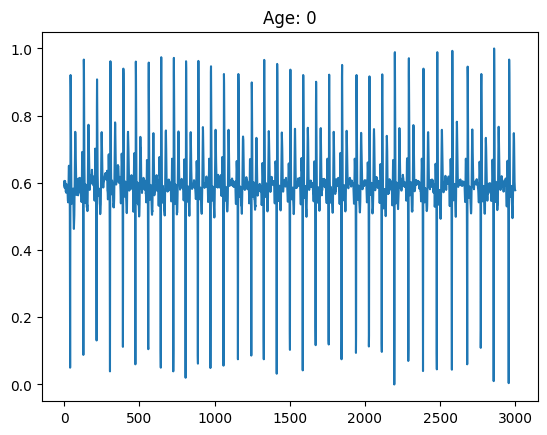

torch.Size([3000])


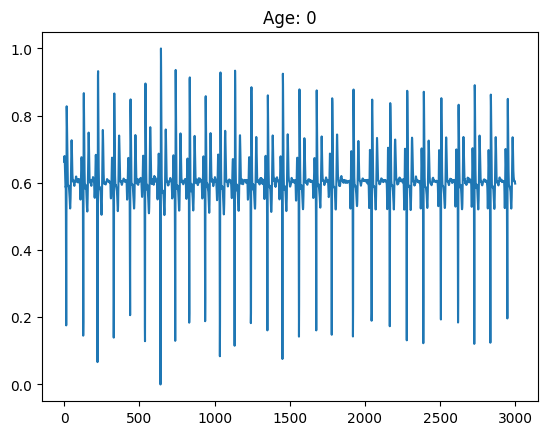

In [5]:
p_ds = datasource.PartialDataset(ds_csv, seg_index=ds_csv.indexes, shuffle=True)

for i in range(2):
    samp = p_ds[i]
    ecg = samp['ecg'][0]
    print(ecg.shape)
    plt.plot(range(len(ecg)), ecg)
    plt.title(f"Age: {samp['age']}")
    plt.show()

In [9]:
data_dir = "/home/mahabib/data/mesa/polysomnography/set2x10"
for f in os.listdir(data_dir):
    if not f.endswith("_annot.csv"):
        continue
    rec_name = f.split("_")[0]
    df_sig = pd.read_csv(os.path.join(data_dir, f"{rec_name}_sig.csv"))
    val_gt_1 = df_sig[df_sig['100hz'] > 1.1]
    print(f, val_gt_1)

mesa-sleep-1324_annot.csv Empty DataFrame
Columns: [100hz]
Index: []
mesa-sleep-3018_annot.csv Empty DataFrame
Columns: [100hz]
Index: []
mesa-sleep-1571_annot.csv Empty DataFrame
Columns: [100hz]
Index: []
mesa-sleep-2876_annot.csv Empty DataFrame
Columns: [100hz]
Index: []
mesa-sleep-1673_annot.csv Empty DataFrame
Columns: [100hz]
Index: []
mesa-sleep-1913_annot.csv Empty DataFrame
Columns: [100hz]
Index: []
mesa-sleep-1670_annot.csv Empty DataFrame
Columns: [100hz]
Index: []
mesa-sleep-3392_annot.csv Empty DataFrame
Columns: [100hz]
Index: []
mesa-sleep-0064_annot.csv Empty DataFrame
Columns: [100hz]
Index: []
mesa-sleep-2519_annot.csv Empty DataFrame
Columns: [100hz]
Index: []


In [5]:
data_info_file = "/home/mahabib/data/mesa/datasets/mesa-sleep-dataset-0.6.0.csv"
df = pd.read_csv(data_info_file)
df

,mesaid,examnumber,race1c,gender1,cucmcn1c,sleepage5c,bedtmwkday5c,waketmwkday5c,wkdaysleepdur5c,wkdaysleepdur5t,...,sdrestmidpointnw5,avgsleepmidpointnw5,sdsleepmidpointnw5,avgwhitetaltnw5,avgbluetaltnw5,avggreentaltnw5,avgredtaltnw5,avgsleepnapdailyrd5,dstoverlap5,epochlength5
0,1,5,1,0,1,70,22:30:00,7:30:00,9:00:00,9.0,...,0:47:00,3:42:23,0:47:11,25.625000,0.000000,1.250000,0.125000,28.875000,0.0,30.0
1,2,5,1,0,1,83,22:00:00,6:00:00,8:00:00,8.0,...,0:37:24,2:03:09,0:37:42,0.500000,0.000000,0.000000,0.000000,24.500000,0.0,30.0
2,6,5,4,0,1,57,23:30:00,6:30:00,7:00:00,7.0,...,0:34:53,3:29:56,0:36:54,104.857143,6.000000,20.071429,9.428571,15.428571,0.0,30.0
3,10,5,1,1,1,57,23:30:00,5:00:00,5:30:00,5.5,...,2:43:56,2:35:19,2:44:18,1.125000,0.000000,0.375000,0.000000,235.000000,0.0,30.0
4,12,5,1,1,1,80,20:30:00,7:00:00,10:30:00,10.5,...,11:05:02,13:11:20,11:04:51,80.583333,5.583333,14.000000,9.916667,38.000000,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,6804,5,3,0,1,77,22:00:00,7:00:00,9:00:00,9.0,...,0:16:56,2:40:34,0:16:00,53.071429,0.285714,2.214286,0.357143,43.750000,0.0,30.0
2233,6807,5,4,1,1,60,21:00:00,5:30:00,8:30:00,8.5,...,0:31:18,1:57:55,0:32:15,112.666667,31.833333,61.416667,32.000000,4.750000,0.0,30.0
2234,6810,5,4,1,1,77,22:30:00,7:00:00,8:30:00,8.5,...,0:22:36,2:45:03,0:23:19,157.666667,11.416667,27.333333,9.416667,0.000000,0.0,30.0
2235,6811,5,4,1,1,79,21:30:00,5:00:00,7:30:00,7.5,...,0:10:49,1:39:00,0:12:11,3.750000,0.000000,0.166667,0.166667,4.571429,0.0,30.0


In [10]:
row = df[df['mesaid']==12]
row['sleepage5c']
print(df[df['mesaid']==12].sleepage5c.item())

80


In [9]:
ages_unique = df['sleepage5c'].unique()
ages_unique.sort()
ages_unique

array([54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95])